In [1]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import seaborn as sns


az.style.use('arviz-darkgrid')

In [2]:
WAFFLE_DATA = 'waffle_divorce.csv'
DATA_FOLDER = '../../data'

In [3]:
df_waf = pd.read_csv(f'{DATA_FOLDER}/{WAFFLE_DATA}')
df_waf.head()

,Unnamed: 0,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,1,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,2,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,3,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,4,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,5,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [4]:
df_waf['age_stan'] = (df_waf['MedianAgeMarriage'] - df_waf['MedianAgeMarriage'].mean()) / df_waf['MedianAgeMarriage'].std()
df_waf['divorce_stan'] = (df_waf['Divorce'] - df_waf['Divorce'].mean()) / df_waf['Divorce'].std()
df_waf['marriage_stan'] = (df_waf['Marriage'] - df_waf['Marriage'].mean()) /df_waf['Marriage'].std()

# Predictor Residual Plots

## Marriage rate against median age

$$
\begin{align*}
    M_i     & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_A \cdot A_i\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_A & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$

### Code 5.13

In [5]:
with pm.Model() as m_5_4:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_A = pm.Normal('beta_A', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_A * df_waf['age_stan'])
    M = pm.Normal('marriage', mu=mu, sigma=sigma, observed=df_waf['marriage_stan'])
    
    trace_5_4 = pm.sample(5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_A, alpha]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 8 seconds.


In [6]:
df_tr_5_4 = pm.trace_to_dataframe(trace_5_4)
df_tr_5_4.head()

,alpha,beta_A,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,-0.006917,-0.699376,0.767597,0.417108,0.473345,0.135925,0.979475,-0.426442,0.192161,-0.876336,...,0.248398,0.473345,0.473345,1.541842,-0.482679,-0.201495,0.079688,0.585818,-0.145259,1.035712
1,-0.074144,-0.713310,0.611421,0.358328,0.415685,0.071543,0.931899,-0.502028,0.128900,-0.960884,...,0.186257,0.415685,0.415685,1.505470,-0.559385,-0.272599,0.014186,0.530400,-0.215242,0.989256
2,0.035913,-0.637492,0.756696,0.422418,0.473679,0.166115,0.935024,-0.346491,0.217376,-0.756576,...,0.268636,0.473679,0.473679,1.447630,-0.397752,-0.141449,0.114854,0.576200,-0.090188,0.986285
3,0.035913,-0.637492,0.756696,0.422418,0.473679,0.166115,0.935024,-0.346491,0.217376,-0.756576,...,0.268636,0.473679,0.473679,1.447630,-0.397752,-0.141449,0.114854,0.576200,-0.090188,0.986285
4,-0.116776,-0.738169,0.661271,0.330768,0.390124,0.033989,0.924328,-0.559571,0.093344,-1.034419,...,0.152700,0.390124,0.390124,1.517888,-0.618927,-0.322147,-0.025367,0.508836,-0.262791,0.983684


In [7]:
df_mu_5_4 = df_tr_5_4.filter(regex='(mu.*)')
df_mu_5_4.head()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,0.417108,0.473345,0.135925,0.979475,-0.426442,0.192161,-0.876336,-0.313969,-2.057306,-0.201495,...,0.248398,0.473345,0.473345,1.541842,-0.482679,-0.201495,0.079688,0.585818,-0.145259,1.035712
1,0.358328,0.415685,0.071543,0.931899,-0.502028,0.128900,-0.960884,-0.387313,-2.165382,-0.272599,...,0.186257,0.415685,0.415685,1.505470,-0.559385,-0.272599,0.014186,0.530400,-0.215242,0.989256
2,0.422418,0.473679,0.166115,0.935024,-0.346491,0.217376,-0.756576,-0.243970,-1.833049,-0.141449,...,0.268636,0.473679,0.473679,1.447630,-0.397752,-0.141449,0.114854,0.576200,-0.090188,0.986285
3,0.422418,0.473679,0.166115,0.935024,-0.346491,0.217376,-0.756576,-0.243970,-1.833049,-0.141449,...,0.268636,0.473679,0.473679,1.447630,-0.397752,-0.141449,0.114854,0.576200,-0.090188,0.986285
4,0.330768,0.390124,0.033989,0.924328,-0.559571,0.093344,-1.034419,-0.440859,-2.280894,-0.322147,...,0.152700,0.390124,0.390124,1.517888,-0.618927,-0.322147,-0.025367,0.508836,-0.262791,0.983684


In [8]:
mu_means_5_4 = df_mu_5_4.apply(np.mean, axis=0)

mu_means_5_4[:5]

mu__0    0.420151
mu__1    0.475770
mu__2    0.142060
mu__3    0.976334
mu__4   -0.414122
dtype: float64

In [9]:
residuals_marriage = df_waf['marriage_stan'].values - mu_means_5_4.values
residuals_marriage[:5]

array([-0.39750733,  1.07403198, -0.09308575,  0.67878888,  0.14713318])

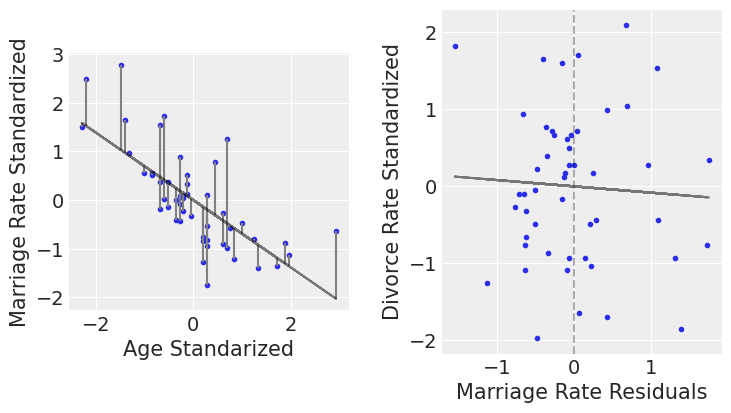

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(df_waf['age_stan'], df_waf['marriage_stan'], marker='.')
ax1.plot(df_waf['age_stan'], mu_means_5_4, 'k-', alpha=0.5)
ax1.vlines(df_waf['age_stan'], mu_means_5_4.values, mu_means_5_4.values + residuals_marriage, colors='grey')

ax1.set_xlabel('Age Standarized')
ax1.set_ylabel('Marriage Rate Standardized')
ax1.set_aspect('equal')

ax2.scatter(residuals_marriage, df_waf['divorce_stan'], marker='.')
ax2.axvline(x=0.0, ls='--', color='k', alpha=0.3)

ax2.set_xlabel('Marriage Rate Residuals')
ax2.set_ylabel('Divorce Rate Standardized')
ax2.set_aspect('equal')


m, c = np.polyfit(residuals_marriage, df_waf['divorce_stan'], deg=1)
fitted_line = [m * x + c for x in residuals_marriage]

ax2.plot(residuals_marriage, fitted_line, 'k-', alpha=0.5)

plt.show()

The plot of the divorce rate against the marriage rate residuals can be thought of as a plot of the divorce rate against the marriage rate after controlling the median age at marriage. As the plot shows, there is very little variation of the divorce rate with the residuals suggesting that the divorce rate is not causally related to the marriage rate (as in having a a directed arrow from $M$ to $D$). 

## Marriage rate against median age
$$
\begin{align*}
    A_i     & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_M \cdot M_i\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_M & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$

In [11]:
with pm.Model() as m_5_5:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_M = pm.Normal('beta_M', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_M * df_waf['marriage_stan'])
    A = pm.Normal('age', mu=mu, sigma=sigma, observed=df_waf['age_stan'])
    
    trace_5_5 = pm.sample(5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_M, alpha]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 6 seconds.


In [12]:
df_tr_5_5 = pm.trace_to_dataframe(trace_5_5)
df_tr_5_5.head()

,alpha,beta_M,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,-0.059906,-0.743894,0.733738,-0.076750,-1.212794,-0.096337,-1.291141,0.138706,-0.723120,0.530445,...,-0.057163,0.079945,-0.331381,-1.917924,0.667554,-0.135511,-0.311794,-0.468489,0.510858,-2.133380
1,-0.070244,-0.765812,0.714804,-0.087585,-1.257101,-0.107749,-1.337758,0.134219,-0.753000,0.537501,...,-0.067421,0.073727,-0.349718,-1.983008,0.678649,-0.148078,-0.329554,-0.490867,0.517337,-2.204813
2,0.151673,-0.653425,0.674270,0.136877,-0.861006,0.119672,-0.929825,0.326131,-0.430884,0.670228,...,0.154082,0.274516,-0.086786,-1.480381,0.790662,0.085262,-0.069581,-0.207220,0.653023,-1.669635
3,-0.022010,-0.576025,0.816164,-0.035053,-0.914734,-0.050220,-0.975401,0.131783,-0.535561,0.435121,...,-0.019886,0.086282,-0.232223,-1.460742,0.541289,-0.080554,-0.217056,-0.338391,0.419954,-1.627578
4,0.069894,-0.865806,0.825960,0.050289,-1.271934,0.027492,-1.363121,0.301055,-0.702010,0.756994,...,0.073086,0.232665,-0.246071,-2.092623,0.916573,-0.018102,-0.223274,-0.405650,0.734197,-2.343390


In [13]:
df_mu_5_5 = df_tr_5_5.filter(regex='(mu.*)')

mu_means_5_5 = df_mu_5_5.apply(np.mean, axis=0)
residuals_age = df_waf['age_stan'].values - mu_means_5_5.values

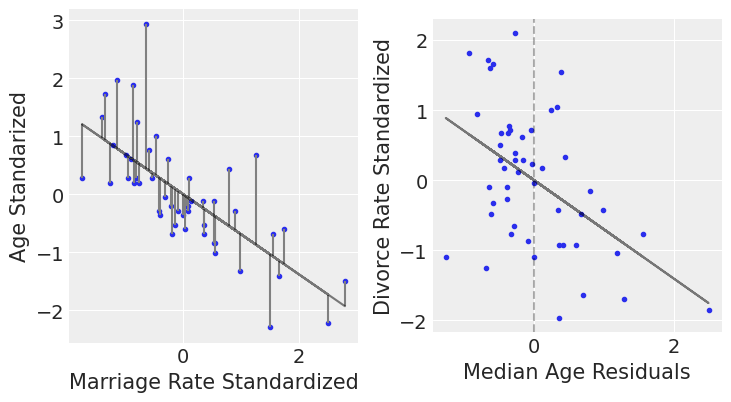

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(df_waf['marriage_stan'], df_waf['age_stan'], marker='.')
ax1.plot(df_waf['marriage_stan'], mu_means_5_5, 'k-', alpha=0.5)
ax1.vlines(df_waf['marriage_stan'], mu_means_5_5.values, mu_means_5_5.values + residuals_age, colors='grey')

ax1.set_ylabel('Age Standarized')
ax1.set_xlabel('Marriage Rate Standardized')
ax1.set_aspect('equal')

ax2.scatter(residuals_age, df_waf['divorce_stan'], marker='.')
ax2.axvline(x=0.0, ls='--', color='k', alpha=0.3)

ax2.set_xlabel('Median Age Residuals')
ax2.set_ylabel('Divorce Rate Standardized')
ax2.set_aspect('equal')


m, c = np.polyfit(residuals_age, df_waf['divorce_stan'], deg=1)
fitted_line = [m * x + c for x in residuals_age]

ax2.plot(residuals_age, fitted_line, 'k-', alpha=0.5)

plt.show()